# Spam Emails Detection using Natural Language Processing (NLP)

In [8]:
# This model detects spam and non-spam emails using nlp

### Importing Libraries

In [33]:
import nltk 
nltk.download('stopwords', "wordnet", 'puntk', 'averaged_perceptron_tagger')

True

In [10]:
import wordcloud

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import warnings 
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv('C://Code4//Email-Spam-Detection//dataset.csv', encoding='latin-1')
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
print(data['label'].value_counts())

ham     4825
spam     747
Name: label, dtype: int64


In [14]:
print("Non-Spam Emails Ratio:",round(len(data[data['label']=='ham'])/len(data['label']),2)*100,"%")
print("Spam Emails Ratio:",round(len(data[data['label']=='spam'])/len(data['label']),2)*100,"%")

Non-Spam Emails Ratio: 87.0 %
Spam Emails Ratio: 13.0 %


In [15]:
data['length']=data.message.str.len()
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
data['message']=data['message'].str.lower()
data.head()

,label,message,length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


###### Replacing email adress with "emailadress"

In [27]:
data['message']=data['message'].str.replace(r'^.+@[^\.].*].[a-z]{2,}$','emailaddress')

###### Replacing URLs with "webadress"

In [18]:
data['message'] = data['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

######  Replacing Currency Symbols with "moneysymbol"

In [20]:
data['message'] = data['message'].str.replace(r'£|$', 'moneysymbol')

###### Replacing phone number with "phonenumber"

In [24]:
data['message'] = data['message'].str.replace(r'^\d{3}[\s-]?\d{3}[\s-]?\d{4}$', 'phonenumber')

###### Replacing numeric character with "number"

In [26]:
data['message'] = data['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

###### Removing Punctuations

In [28]:
data['message'] = data['message'].str.replace(r'[^\w\d\s]', ' ')

###### Removing Whitespaces between words

In [29]:
data['message'] = data['message'].str.replace(r'\s+', ' ')

###### Removing leading and trailing whitesspaces

In [30]:
data['message'] = data['message'].str.replace(r'^\s+|\s+?$', '')

In [31]:
data.head()

,label,message,length
0,ham,go until jurong point crazy available only in ...,111
1,ham,ok lar joking wif u oni dollarsmoneysymbol,29
2,spam,free entry in numbr a wkly comp to win fa cup ...,155
3,ham,u dun say so early hor u c already then say do...,49
4,ham,nah i don t think he goes to usf he lives arou...,61


###### Removing Stopwords

In [38]:
import string
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
data['message'] = data['message'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jawaid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [39]:
data['new_length'] = data.message.str.len()
data.head()

,label,message,length,new_length
0,ham,go jurong point crazy available bugis n great ...,111,101
1,ham,ok lar joking wif oni dollarsmoneysymbol,29,40
2,spam,free entry numbr wkly comp win fa cup final tk...,155,159
3,ham,dun say early hor c already say dollarsmoneysy...,49,50
4,ham,nah think goes usf lives around thoughdollarsm...,61,56


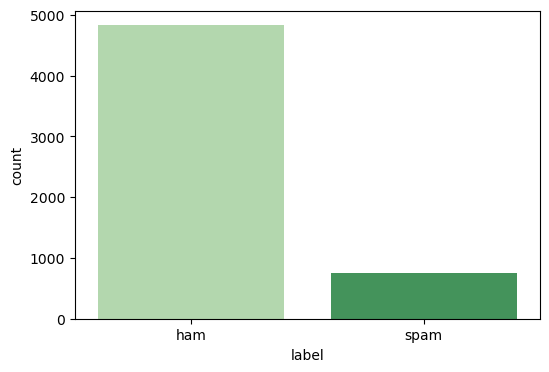

ham     4825
spam     747
Name: label, dtype: int64


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'label' column to categorical data type
data['label'] = data['label'].astype('category')

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='label', palette='Greens')
plt.xticks(rotation='horizontal')
plt.show()
print(data.label.value_counts())


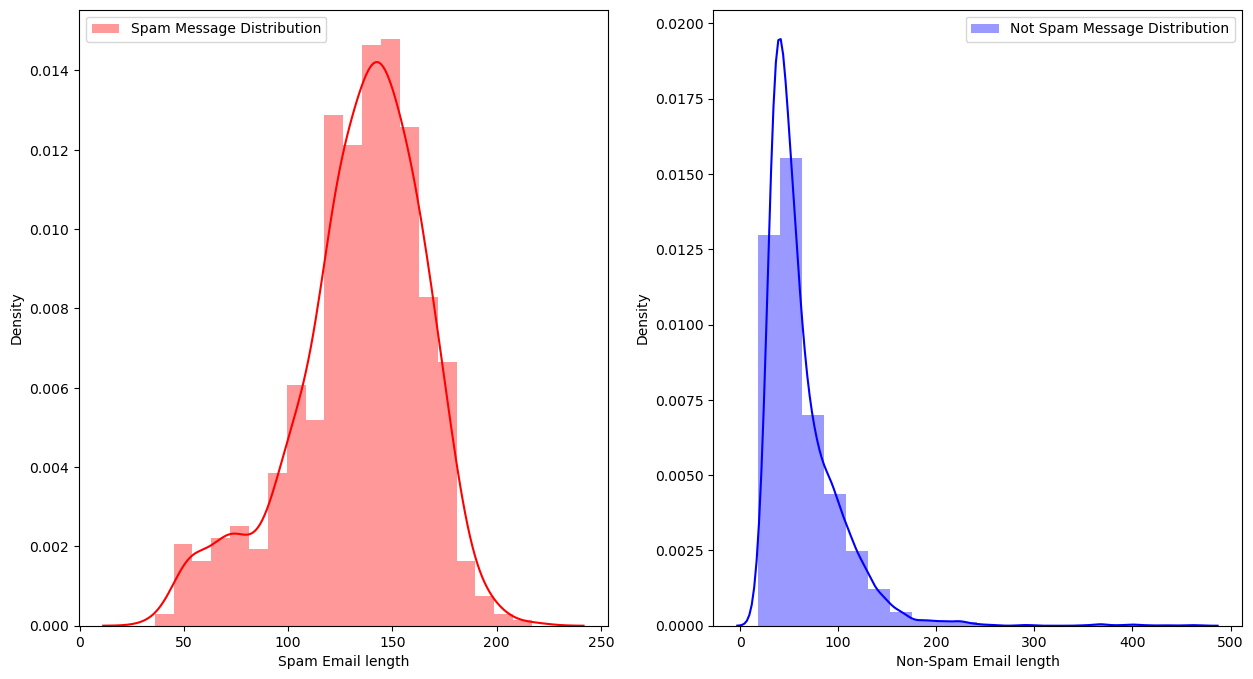

In [62]:
f, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.distplot(data[data['label']=='spam']['new_length'], bins=20, ax=ax[0], label='Spam Message Distribution', color='r')
ax[0].set_xlabel('Spam Email length')
ax[0].legend()

sns.distplot(data[data['label']=='ham']['new_length'], bins=20, ax=ax[1], label='Not Spam Message Distribution', color='b')
ax[1].set_xlabel('Non-Spam Email length')
ax[1].legend()

plt.show()


#### Loud words in Spam

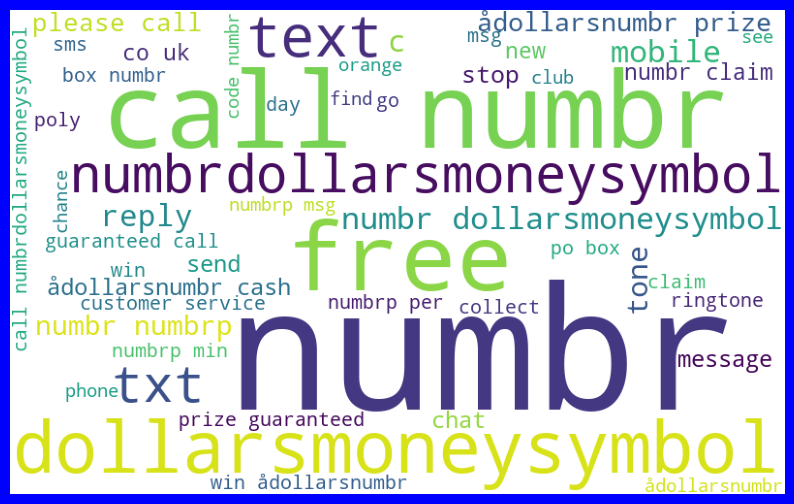

In [64]:
from wordcloud import WordCloud

# Filter spam messages
spams = data[data['label'] == 'spam']['message']

if len(spams) > 0:
    spam_cloud = WordCloud(width=800, height=500, background_color='white', max_words=50).generate(' '.join(spams))
    
    plt.figure(figsize=(10, 8), facecolor='b')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.show()
else:
    print("No spam messages found in the dataset.")


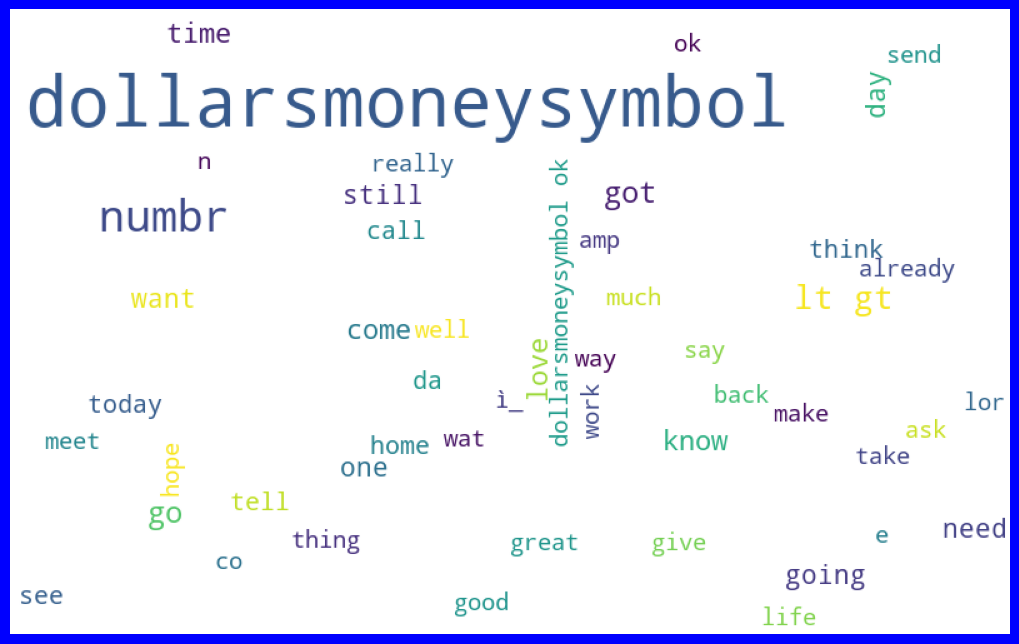

In [65]:
from wordcloud import WordCloud

not_spams = data['message'][data['label'] == 'ham']
if len(spams) > 0:
    spam_cloud = WordCloud(width=800, height=500, background_color='white', max_words=50).generate(' '.join(not_spams))
    plt.figure(figsize=(10, 8), facecolor='b')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

else:
    print("No ham messages found in the dataset.")

### Converting text into vectors using TF-IDF, instantiating MultinomialNB classifier and spliting feature and label

In [68]:
tf_vec = TfidfVectorizer()

#naive = MultinomialNB()

SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')

features = tf_vec.fit_transform(data['message'])

X = features
y = data['label']

X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)         


SVM.fit(X_train,Y_train)
y_pred = SVM.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9849246231155779


In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1202
        spam       0.99      0.90      0.94       191

    accuracy                           0.98      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.98      0.98      1393



[Text(0, 0.5, 'not spam'), Text(0, 1.5, 'spam')]

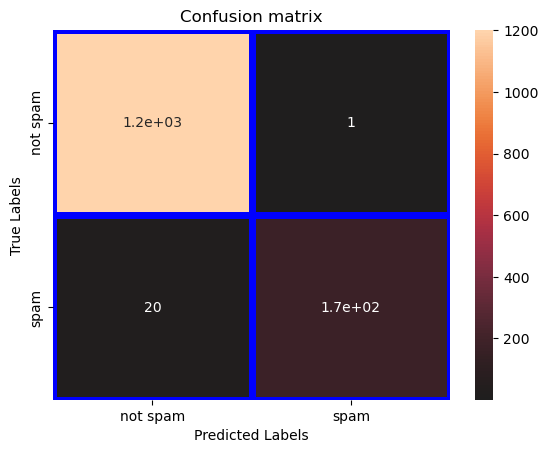

In [71]:
confusion_matrixx = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(confusion_matrixx,annot=True,ax=ax,linewidths=5,linecolor='b',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])